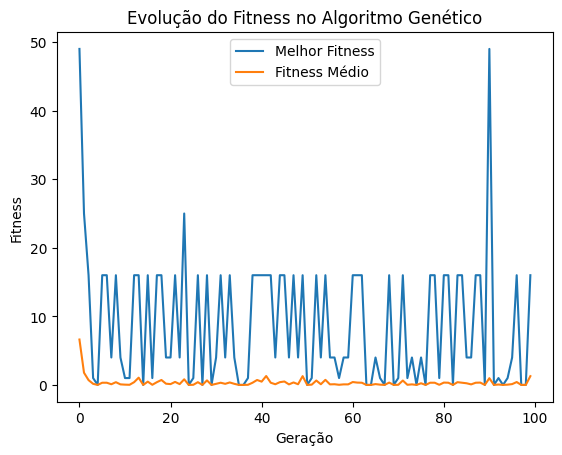

Tendo o melhor resultado encontrado: 4
Valor da função objetivo: 16


In [ ]:
# Importando as bibliotecas
import random
import matplotlib.pyplot as plt

# Criando a função de avaliação (fitness)
def evaluate(individual):
    x = decode_individual(individual)
    return x ** 2

# Decodificação do indivíduo para o domínio do problema
def decode_individual(individual):
    return int(''.join(str(bit) for bit in individual), 2)

# Criando a função seleção de pais usando torneio binário
def select_parents(population, num_parents):
    parents = []
    for _ in range(num_parents):
        tournament = random.sample(population, 2)
        tournament.sort(key=lambda ind: evaluate(ind))
        parents.append(tournament[0])
    return parents

# Criando a função de cruzamento (crossover) de dois pais
def crossover(parent1, parent2):
    point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]
    return child1, child2

# Criando a função de mutação de um indivíduo
def mutate(individual, mutation_rate):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = 1 - individual[i]  # Troca o bit
    return individual

# Função principal do AG
def genetic_algorithm(population_size, num_generations, crossover_rate, mutation_rate):
    best_fitness_values = []
    avg_fitness_values = []

    # Iniciando a população
    population = []
    for _ in range(population_size):
        individual = [random.randint(0, 1) for _ in range(3)]  # Representação binária de 0 a 7 (3 bits)
        population.append(individual)

    # Evolução da população por várias gerações
    for generation in range(num_generations):
        new_population = []

        # Selecionando de pais
        parents = select_parents(population, len(population))

        # Tendo o cruzamento e mutação para gerar os filhos
        for i in range(0, len(parents), 2):
            parent1 = parents[i]
            parent2 = parents[i + 1]
            if random.random() < crossover_rate:
                child1, child2 = crossover(parent1, parent2)
            else:
                child1, child2 = parent1[:], parent2[:]
            child1 = mutate(child1, mutation_rate)
            child2 = mutate(child2, mutation_rate)
            new_population.extend([child1, child2])

        # Avaliando a nova população
        population = new_population

        # Acompanhando o fitness
        fitness_values = [evaluate(individual) for individual in population]
        best_fitness = max(fitness_values)
        avg_fitness = sum(fitness_values) / len(population)
        best_fitness_values.append(best_fitness)
        avg_fitness_values.append(avg_fitness)

    # Avaliando o final da população e retorno do melhor indivíduo
    best_individual = max(population, key=lambda ind: evaluate(ind))

    # Plotando os gráficos do AG
    plt.plot(range(num_generations), best_fitness_values, label='Melhor Fitness')
    plt.plot(range(num_generations), avg_fitness_values, label='Fitness Médio')
    plt.xlabel('Geração')
    plt.ylabel('Fitness')
    plt.title('Evolução do Fitness no Algoritmo Genético')
    plt.legend()
    plt.show()

    return decode_individual(best_individual)

# Colocando os parâmetros do AG
population_size = 50
num_generations = 100
crossover_rate = 0.8
mutation_rate = 0.01

# Executando o AG
result = genetic_algorithm(population_size, num_generations, crossover_rate, mutation_rate)
print("Tendo o melhor resultado encontrado:", result)
print("Valor da função objetivo:", result ** 2)

# Explicação mais detalhada do AG

A função evaluate(individual): Essa função recebe um indivíduo como entrada (representado por uma lista de bits) e decodifica esse indivíduo para o domínio do problema, que é um número inteiro entre 0 e 7. Em seguida, ela retorna o resultado do quadrado desse número, que é o valor de fitness (avaliação) do indivíduo.

A função decode_individual(individual): Essa função recebe um indivíduo e decodifica sua representação binária para um número inteiro no domínio do problema. Ela percorre os bits do indivíduo, concatenando-os em uma única string e convertendo essa string para um número inteiro.

A função select_parents(population, num_parents): Essa função implementa a seleção de pais usando o método do torneio binário. Ela seleciona aleatoriamente dois indivíduos da população e os compara com base no seu valor de fitness. O indivíduo com o melhor fitness é escolhido como um dos pais. Esse processo é repetido para selecionar o número especificado de pais.

A função crossover(parent1, parent2): Essa função realiza o cruzamento (crossover) entre dois pais. Ela seleciona aleatoriamente um ponto de corte na representação binária dos pais e troca os bits após esse ponto entre os pais, gerando dois filhos resultantes do crossover.

A função mutate(individual, mutation_rate): Essa função implementa a mutação em um indivíduo. Ela percorre cada bit do indivíduo e, com uma probabilidade igual à taxa de mutação especificada, inverte o bit (troca 0 por 1 ou 1 por 0).

A função genetic_algorithm(population_size, num_generations, crossover_rate, mutation_rate): Essa é a função principal que executa o Algoritmo Genético. Ela inicia a população com indivíduos aleatórios representados por listas de bits. Em cada geração, os pais são selecionados, ocorre o cruzamento e mutação para gerar a nova população. A função de avaliação é usada para determinar o fitness de cada indivíduo. O algoritmo é repetido por um número especificado de gerações. Os melhores valores de fitness e valores médios de fitness são armazenados e, ao final, um gráfico é gerado mostrando a evolução do fitness ao longo das gerações. O melhor indivíduo encontrado é retornado.

Os parâmetros do AG, como tamanho da população, número de gerações, taxa de cruzamento e taxa de mutação, são definidos.

O AG é executado chamando a função genetic_algorithm com os parâmetros definidos. O resultado é impresso, mostrando o melhor indivíduo encontrado e o valor da função objetivo correspondente (quadrado do melhor indivíduo).

Em resumo, o código implementa um AG básico para maximizar uma função quadrática simples. Ele utiliza representação binária para os indivíduos, seleção de pais por torneio binário, cruzamento de dois pontos (crossover) e mutação para explorar novas soluções. O AG é executado por um número de gerações especificado, acompanhando a evolução do fitness ao longo do tempo. Ao final, é retornado o melhor indivíduo encontrado e seu valor correspondente na função objetivo.

O uso de uma representação binária permite uma abordagem simples para lidar com o espaço de busca discreto do problema. A seleção de pais por torneio binário oferece uma maneira eficiente de escolher os melhores indivíduos para reprodução, dando preferência aos mais aptos. O cruzamento entre pais ocorre com uma taxa de cruzamento especificada, permitindo a troca de informações genéticas entre os indivíduos. A mutação, com uma taxa de mutação determinada, ajuda a introduzir diversidade na população, evitando a estagnação em soluções subótimas.

Durante a execução do AG, os valores de fitness são avaliados para cada indivíduo na população, permitindo acompanhar a melhoria do desempenho ao longo das gerações. Isso é visualizado por meio de um gráfico que mostra a evolução do melhor fitness e do fitness médio ao longo do tempo.

Embora o exemplo em si seja simples, o código serve como uma base para a implementação de AGs mais complexos. Pode-se ajustar os parâmetros, como tamanho da população, número de gerações, taxas de cruzamento e mutação, para explorar diferentes configurações e buscar soluções ótimas em problemas mais desafiadores.

Em suma, o código fornece uma introdução ao funcionamento básico de um Algoritmo Genético e pode ser utilizado como ponto de partida para aplicá-lo em problemas reais, adaptando e aprimorando-o conforme necessário.
